# Tugas Kelompok - 1
---
## Anggota Kelompok
- Frederick Liko
- Kenzie Pragata
- Aswin Angkasa
- Giovanny Halimko
- Samuel Onasis

## Table of Contents
- [Tugas Kelompok - 1](#tugas-kelompok---1)
    - [Anggota Kelompok](#anggota-kelompok)
    - [Table of Contents](#table-of-contents)
    - [To-Do Task](#to-do-task)
    - [Tahap 1 (Dataset Preparation, and Preprocessing)](#tahap-1-dataset-preparation-and-preprocessing)
        - [Pilih 50 citra dari database - COCO](#pilih-50-citra-dari-database---coco)
        - [Preprocessing pada citra](#preprocessing-pada-citra)
            - [Declare Function](#declare-function)
            - [Display Image](#display-image)
            - [Process Image](#process-image)
    - [Tahap 2 (Image Separation and Feature Detection)](#tahap-2-image-separation-and-feature-detection)
        - [Segmentation](#segmentation)
        - [Feature Detection](#feature-detection)
    - [Tahap 3 (Noise Removal and Quality Enhancement)](#tahap-3-noise-removal-and-quality-enhancement)
        - [Noise Removal](#noise-removal)
        - [Edge Detection](#edge-detection)
    - [Tahap 4 (Object Segmentation Enhancement)](#tahap-4-object-segmentation-enhancement)
        - [Peningkatan Segmentasi](#peningkatan-segmentasi)
        - [Pengolahan Citra](#pengolahan-citra)
    - [Tahap 5 (Feature Detection and Object Matching)](#tahap-5-feature-detection-and-object-matching)

## To-Do Task
> Harap lakukan instalasi `Markdown Checkbox Extension` agar format *checkbox* dapat terlihat.
[Download](https://marketplace.visualstudio.com/items/?itemName=bierner.markdown-checkbox)

**Tahap 1**
- [x] Pilih 50 citra dari database - WikiImg, ImageNet
- [x] Preprocessing pada citra - Normalisasi / Contrast / Sharpening

**Tahap 2**
- [x] Lakukan pemisahan pada citra - Edge Detection, Thresholding, atau Segmentasi
- [x] Lakukan deteksi fitur pada citra - Harris Corner Detection atau SIFT

**Tahap 3**
- [x] Lakukan konvolusi untuk menghilangkan noise - Gaussian Blur, atau Median Filter
- [x] Lakukan peningkatan kualitas citra - Kernel Prewit, Robert, atau Sobel (Minimal 2)

**Tahap 4**
- [x] Tingkatkan segmentasi objek pada citra - Dilasi, Erosi, Opening atau Closing (Minimal 2)
- [x] Olah citra dengan: Hitung lubang, Skeletonisasi, atau Filling Holes

**Tahap 5**
- [ ] Deteksi fitur - SIFT, SURF, atau ORB
- [ ] Lakukan pencocokan objek menggunakan citra satu dengan citra lainnya

## Preparation

### Import Library
Disini adalah beberapa library yang digunakan dalam tugas ini. Library ini digunakan untuk melakukan berbagai operasi pada citra, seperti pembacaan citra, konversi warna, dan pemrosesan citra.

**Lakukan instalasi library yang diperlukan dengan perintah berikut:**

```bash
pip install opencv-python numpy matplotlib scikit-image
```


In [2]:
import os

import numpy as np
import cv2

# Image downloading libraries
import torchvision.datasets as dset
from torchvision.transforms import ToTensor

# Image processing libraries
from PIL import Image, ImageEnhance

# Image rendering libraries
import matplotlib.pyplot as plt


### Quick Setting
Pada bagian ini, kita akan mengatur beberapa parameter yang akan mempermudah kita dalam memproses citra.

- Jumlah citra yang akan digunakan
- Ukuran citra
- Ukuran kernel untuk konvolusi
- Ukuran kernel untuk dilasi dan erosi

In [3]:
# Maximum of 100 can be loaded at once
image_to_load = 50
image_to_process = 1

image_size = (256, 256)

### Quick Check Before Running
Untuk memastikan bahwa semua library yang diperlukan telah terinstal dan dapat digunakan, kita akan melakukan beberapa pengecekan awal. Pastikan Anda telah menginstal semua library yang diperlukan sebelum menjalankan kode ini.


In [4]:
assert image_to_load <= 100, "Maximum of 100 images can be loaded at once."

assert image_to_process <= image_to_load, "Image to process must be less than or equal to image to load."

# Assert librarys are installed
assert dset, "torchvision not installed. Please install torchvision."
assert Image, "PIL not installed. Please install Pillow."
assert plt, "matplotlib not installed. Please install matplotlib."

## Tahap 1 (Dataset Preparation, and Preprocessing)
Pada tahap ini, kita akan melakukan persiapan dataset dan preprocessing pada citra. 

Kita akan menggunakan citra dari dataset yang sudah ada, dan melakukan beberapa operasi preprocessing seperti normalisasi, konversi warna, dan penghapusan noise.

### Pilih 50 citra dari database - COCO
Dibawah ini adalah beberapa citra yang diambil dari database COCO. Citra-citra ini akan digunakan untuk melakukan berbagai operasi pemrosesan citra. Citra-citra ini diambil dari berbagai kategori, seperti hewan, tumbuhan, dan objek lainnya.


In [5]:
from torchvision.transforms.functional import to_pil_image

# Load the COCO dataset using torchvision
coco_dataset = dset.CocoDetection(
    root='coco/images/val2017',
    annFile='coco/annotations/instances_val2017.json',
    transform=ToTensor()
)


# Save up to 50 images from the COCO dataset
output_dir = "coco_images"
os.makedirs(output_dir, exist_ok=True)
for i, (image, _) in enumerate(coco_dataset):
    if i >= image_to_load:  # Limit to 50 images
        break
    image_path = os.path.join(output_dir, f"image_{i+1}.jpg")
    image_pil = to_pil_image(image)
    image_pil.save(image_path)
    print(f"Saved: {image_path}")


loading annotations into memory...
Done (t=1.54s)
creating index...
index created!
Saved: coco_images\image_1.jpg
Saved: coco_images\image_2.jpg
Saved: coco_images\image_3.jpg
Saved: coco_images\image_4.jpg
Saved: coco_images\image_5.jpg
Saved: coco_images\image_6.jpg
Saved: coco_images\image_7.jpg
Saved: coco_images\image_8.jpg
Saved: coco_images\image_9.jpg
Saved: coco_images\image_10.jpg
Saved: coco_images\image_11.jpg
Saved: coco_images\image_12.jpg
Saved: coco_images\image_13.jpg
Saved: coco_images\image_14.jpg
Saved: coco_images\image_15.jpg
Saved: coco_images\image_16.jpg
Saved: coco_images\image_17.jpg
Saved: coco_images\image_18.jpg
Saved: coco_images\image_19.jpg
Saved: coco_images\image_20.jpg
Saved: coco_images\image_21.jpg
Saved: coco_images\image_22.jpg
Saved: coco_images\image_23.jpg
Saved: coco_images\image_24.jpg
Saved: coco_images\image_25.jpg
Saved: coco_images\image_26.jpg
Saved: coco_images\image_27.jpg
Saved: coco_images\image_28.jpg
Saved: coco_images\image_29.jp

### Preprocessing pada citra

- Menggunakan gambar dari dataset COCO untuk operasi peningkatan kontras.
- Peningkatan kontras membantu memperjelas detail pada citra, memudahkan deteksi fitur dan segmentasi.
- Normalisasi dilakukan dengan:
    - Mengubah warna citra menjadi grayscale.
    - Mengubah ukuran citra menjadi 256x256 piksel.
    - Melakukan skalasi dengan rendah (0-255) untuk meningkatkan kontras.
- Ukuran seragam 256x256 piksel mempermudah proses pemrosesan citra selanjutnya.


#### Declare Function
Disini adalah beberapa fungsi yang digunakan untuk melakukan operasi pada citra. Fungsi-fungsi ini digunakan untuk melakukan berbagai operasi seperti pembacaan citra, konversi warna, dan pemrosesan citra.

In [6]:
def resize_image(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Resize the image
    image = image.resize(image_size)

    # Save the processed image
    image.save(output_path)
    print(f"Resized and saved: {output_path}")

def convert_to_grayscale(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Convert to grayscale
    image = image.convert("L")

    # Save the processed image
    image.save(output_path)
    print(f"Converted to grayscale and saved: {output_path}")

def enhance_contrast(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Enhance contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.0)

    # Save the processed image
    image.save(output_path)
    print(f"Enhanced contrast and saved: {output_path}")

def sharpen_image(image_path, output_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Sharpen the image
    enhancer = ImageEnhance.Sharpness(image)
    image = enhancer.enhance(2.0)

    # Save the processed image
    image.save(output_path)
    print(f"Sharpened and saved: {output_path}")

def normalize_image(image_path, output_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Normalize the image to [0, 1]
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    # Convert back to uint8 for saving
    image = (image * 255).astype(np.uint8)

    # Save the processed image
    cv2.imwrite(output_path, image)
    print(f"Normalized and saved: {output_path}")

def process_image(image_path, output_path):
    # Resize the image
    resize_image(image_path, output_path)

    # Convert to grayscale
    convert_to_grayscale(image_path, output_path)

    # Enhance contrast
    enhance_contrast(image_path, output_path)

    # Sharpen the image
    sharpen_image(image_path, output_path)

    # Normalize the image
    normalize_image(image_path, output_path)

#### Display Image
Untuk menampilkan citra yang telah diproses, kita akan menggunakan fungsi `display_image`. 

Fungsi ini akan menampilkan citra dalam ukuran yang sesuai dengan ukuran citra asli. Kita juga akan menambahkan judul pada citra yang ditampilkan untuk memudahkan identifikasi citra.

Dengan memanfaatkan matplotlib, kita dapat menampilkan citra dengan lebih baik dan memberikan informasi tambahan seperti judul dan ukuran citra.



In [7]:
import matplotlib.patches as patches

def display_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()



### Process Image
Disini adalah beberapa citra yang telah diproses dengan menggunakan fungsi-fungsi yang telah didefinisikan sebelumnya. Citra-citra ini telah mengalami berbagai operasi pemrosesan citra seperti konversi warna, normalisasi, dan penghapusan noise.

Resized and saved: processed_images\processed_image_1.jpg
Converted to grayscale and saved: processed_images\processed_image_1.jpg
Enhanced contrast and saved: processed_images\processed_image_1.jpg
Sharpened and saved: processed_images\processed_image_1.jpg
Normalized and saved: processed_images\processed_image_1.jpg


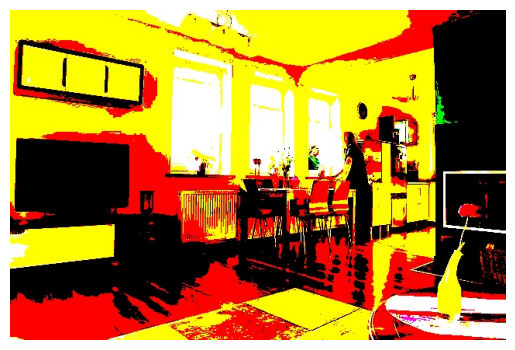

In [8]:
input_dir = 'coco_images'
output_dir = 'processed_images'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Process and display the images
for i in range(1, image_to_process + 1):
    image_path = os.path.join(input_dir, f"image_{i}.jpg")
    output_path = os.path.join(output_dir, f"processed_image_{i}.jpg")

    # Process the image
    process_image(image_path, output_path)

    # Display the processed image
    display_image(output_path)




## Tahap 2 (Image Separation and Feature Detection)
Pada tahap ini, kita akan melakukan pemisahan pada citra dan deteksi fitur. Kita akan menggunakan beberapa metode untuk melakukan pemisahan citra, seperti deteksi tepi, thresholding, dan segmentasi. Selain itu, kita juga akan melakukan deteksi fitur pada citra menggunakan metode Harris Corner Detection atau SIFT.

### Import Library
Disini adalah beberapa library tambahan yang digunakan untuk tahap ini. Library ini digunakan untuk melakukan deteksi fitur dan segmentasi pada citra.

### Segmentation

Segmentation adalah proses pemisahan citra menjadi beberapa bagian atau objek yang lebih kecil untuk analisis lebih lanjut. 

Pada tahap ini, kita akan menggunakan metode seperti:
- **Thresholding**: Teknik untuk memisahkan objek berdasarkan intensitas piksel.
- **Edge Detection**: Menggunakan algoritma seperti Canny atau Sobel untuk mendeteksi tepi objek.
- **Region-based Segmentation**: Memisahkan objek berdasarkan kesamaan piksel dalam suatu wilayah.

Metode-metode ini membantu dalam memahami struktur dan fitur penting dari citra.


Segmented image saved: segmented_images\segmented_image_1.jpg


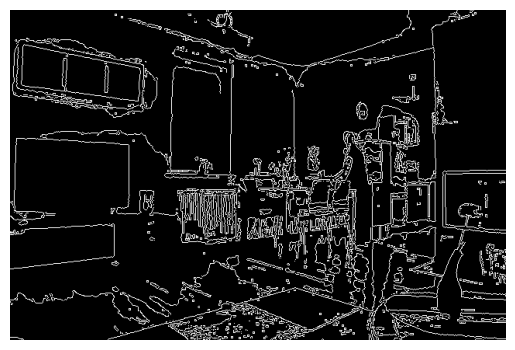

In [9]:
def segment_image(image_path, output_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    segmented = cv2.Canny(image, 100, 200)

    # Save the segmented image
    cv2.imwrite(output_path, segmented)
    print(f"Segmented image saved: {output_path}")

    return segmented

# Example usage
segmented_dir = 'segmented_images'
os.makedirs(segmented_dir, exist_ok=True)

for i in range(1, image_to_process + 1):
    input_path = os.path.join(output_dir, f"processed_image_{i}.jpg")
    output_path = os.path.join(segmented_dir, f"segmented_image_{i}.jpg")

    # Perform segmentation
    segmented_image = segment_image(input_path, output_path)

    # Display the segmented image
    plt.imshow(segmented_image, cmap='gray')
    plt.axis('off')
    plt.show()


### Feature Detection
Deteksi fitur adalah proses menemukan titik-titik penting dalam citra yang dapat digunakan untuk analisis lebih lanjut.

Pada tahap ini, kita akan menggunakan metode seperti:
- **Harris Corner Detection**: Algoritma untuk mendeteksi sudut dan tepi dalam citra.
- **SIFT (Scale-Invariant Feature Transform)**: Metode untuk mendeteksi dan menggambarkan fitur lokal dalam citra.

Namun, pada tahap ini kita hanya akan menggunakan metode SIFT untuk mendeteksi fitur pada citra. SIFT adalah metode yang kuat dan efisien untuk mendeteksi fitur dalam citra, dan dapat digunakan untuk berbagai aplikasi seperti pencocokan objek dan pengenalan pola.

Feature-detected image saved: feature_detected_images\feature_image_1.jpg


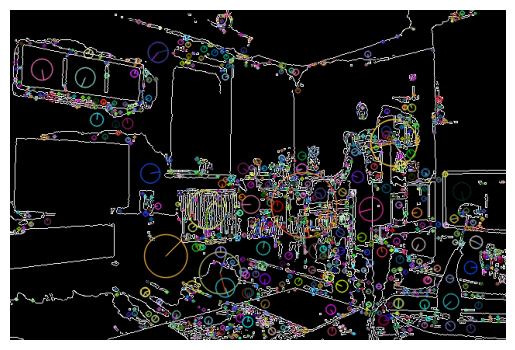

In [10]:
def detect_features(image_path, output_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Draw keypoints on the image
    feature_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the feature-detected image
    cv2.imwrite(output_path, feature_image)
    print(f"Feature-detected image saved: {output_path}")

    return feature_image, keypoints

# Example usage
feature_dir = 'feature_detected_images'
os.makedirs(feature_dir, exist_ok=True)

for i in range(1, image_to_process + 1):
    input_path = os.path.join(segmented_dir, f"segmented_image_{i}.jpg")
    output_path = os.path.join(feature_dir, f"feature_image_{i}.jpg")

    # Perform feature detection
    feature_image, keypoints = detect_features(input_path, output_path)

    # Display the feature-detected image
    plt.imshow(cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

## Tahap 3 (Noise Removal and Quality Enhancement)
Pada tahap ini, kita akan melakukan penghapusan noise pada citra dan peningkatan kualitas citra. Kita akan menggunakan beberapa metode untuk melakukan penghapusan noise, seperti Gaussian Blur atau Median Filter. Selain itu, kita juga akan melakukan peningkatan kualitas citra menggunakan metode seperti Kernel Prewit, Robert, atau Sobel.

### Noise Removal
Penghapusan noise adalah proses menghilangkan gangguan atau noise yang ada pada citra. Noise dapat mengganggu analisis citra dan mengurangi kualitas citra.

Pada tahap ini, kita akan menggunakan metode seperti:
- **Gaussian Blur**: Metode untuk menghaluskan citra dengan menggunakan filter Gaussian.
- **Median Filter**: Metode untuk menghilangkan noise dengan mengganti nilai piksel dengan nilai median dari sekitarnya.
- **Bilateral Filter**: Metode untuk menghaluskan citra sambil mempertahankan tepi objek.

Noise removed using Gaussian Blur and saved: denoised_images\denoised_image_1.jpg


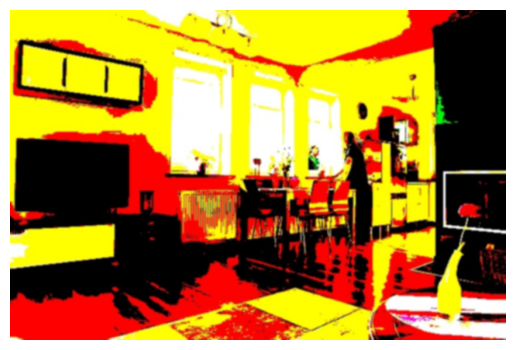

In [ ]:
def remove_noise_gaussian(image_path, output_path, kernel_size=(5, 5)):
    #Load the image using OpenCV
     image = cv2.imread(image_path)

     #Apply Gaussian Blur
     denoised_image = cv2.GaussianBlur(image, kernel_size, 0)

     # Save the denoised image
     cv2.imwrite(output_path, denoised_image)
     print(f"Noise removed using Gaussian Blur and saved: {output_path}")

     return denoised_image

# Example usage
denoised_dir = 'denoised_images'
os.makedirs(denoised_dir, exist_ok=True)

for i in range(1, image_to_process + 1):
    input_path = os.path.join(output_dir, f"processed_image_{i}.jpg")
    output_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")

    # Perform noise removal
    denoised_image = remove_noise_gaussian(input_path, output_path)
    # Display the denoised image
    plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Prewitt edge detection applied and saved: prewitt_images\prewitt_image_1.jpg


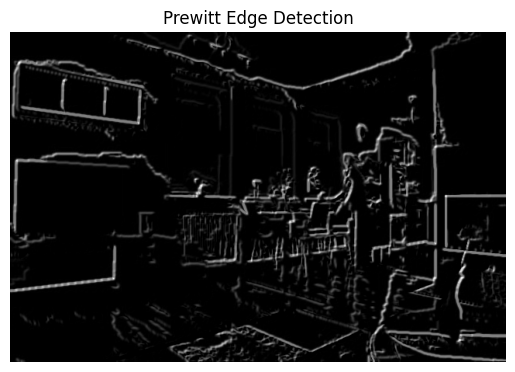

Roberts edge detection applied and saved: roberts_images\roberts_image_1.jpg


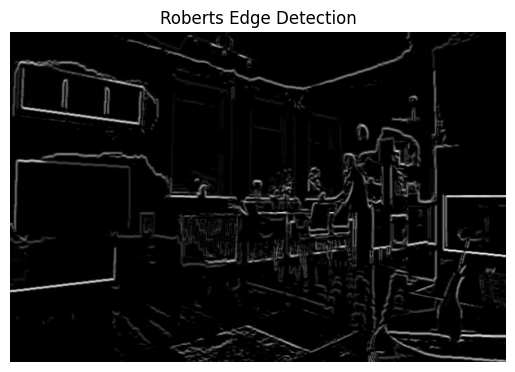

In [22]:
def apply_prewitt(image_path, output_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define Prewitt kernels
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    # Apply the kernels
    prewitt_x = cv2.filter2D(image, -1, kernel_x)
    prewitt_y = cv2.filter2D(image, -1, kernel_y)

    # Combine the results
    prewitt_combined = cv2.addWeighted(prewitt_x, 0.5, prewitt_y, 0.5, 0)

    # Save the result
    cv2.imwrite(output_path, prewitt_combined)
    print(f"Prewitt edge detection applied and saved: {output_path}")

    return prewitt_combined

def apply_roberts(image_path, output_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define Roberts kernels
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Apply the kernels
    roberts_x = cv2.filter2D(image, -1, kernel_x)
    roberts_y = cv2.filter2D(image, -1, kernel_y)

    # Combine the results
    roberts_combined = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)

    # Save the result
    cv2.imwrite(output_path, roberts_combined)
    print(f"Roberts edge detection applied and saved: {output_path}")

    return roberts_combined

# Example usage
prewitt_dir = 'prewitt_images'
roberts_dir = 'roberts_images'
os.makedirs(prewitt_dir, exist_ok=True)
os.makedirs(roberts_dir, exist_ok=True)

for i in range(1, image_to_process + 1):
    input_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")
    prewitt_output_path = os.path.join(prewitt_dir, f"prewitt_image_{i}.jpg")
    roberts_output_path = os.path.join(roberts_dir, f"roberts_image_{i}.jpg")

    # Apply Prewitt
    prewitt_image = apply_prewitt(input_path, prewitt_output_path)

    # Display Prewitt result
    plt.imshow(prewitt_image, cmap='gray')
    plt.axis('off')
    plt.title('Prewitt Edge Detection')
    plt.show()

    # Apply Roberts
    roberts_image = apply_roberts(input_path, roberts_output_path)

    # Display Roberts result
    plt.imshow(roberts_image, cmap='gray')
    plt.axis('off')
    plt.title('Roberts Edge Detection')
    plt.show()

## Tahap 4 (Peningkatan Segmentasi dan Pengolahan Citra)
Pada tahap ini, kita akan melakukan peningkatan segmentasi objek pada citra dan pengolahan citra lebih lanjut. Kita akan menggunakan beberapa metode untuk melakukan peningkatan segmentasi, seperti dilasi, erosi, opening, atau closing. Selain itu, kita juga akan melakukan pengolahan citra seperti menghitung lubang, skeletonisasi, atau filling holes.


### Peningkatan Segmentasi
Dengan memanfaatkan ****dilasi, dan erosi****, kita dapat meningkatkan segmentasi objek pada citra. Metode ini membantu dalam memperbaiki batas objek dan menghilangkan noise yang tersisa setelah tahap sebelumnya.



Dilated image saved: morphological_results\dilated_image.jpg
Eroded image saved: morphological_results\eroded_image.jpg


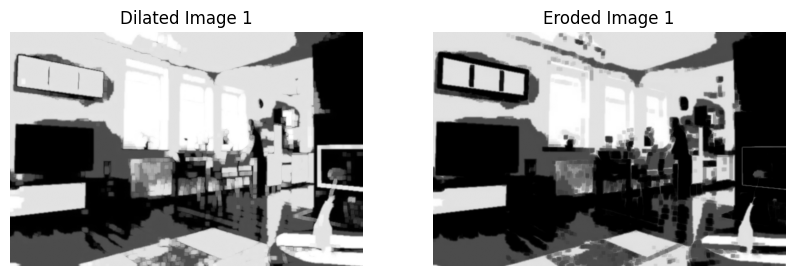

In [34]:
# Perform morphological operations: Dilation and Erosion
def apply_morphological_operations(image_path, output_directory):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply dilation
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    dilated_path = os.path.join(output_directory, "dilated_image.jpg")
    cv2.imwrite(dilated_path, dilated_image)
    print(f"Dilated image saved: {dilated_path}")

    # Apply erosion
    eroded_image = cv2.erode(image, kernel, iterations=1)
    eroded_path = os.path.join(output_directory, "eroded_image.jpg")
    cv2.imwrite(eroded_path, eroded_image)
    print(f"Eroded image saved: {eroded_path}")

    return dilated_image, eroded_image


output_directory = 'morphological_results'
# Create output directory for morphological results if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Apply morphological operations on multiple images
for i in range(1, image_to_process + 1):
    input_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")
    os.makedirs(output_directory, exist_ok=True)

    # Perform morphological operations
    dilated_image, eroded_image = apply_morphological_operations(input_path, output_directory)

    # Display the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(dilated_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Dilated Image {i}')

    plt.subplot(1, 2, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Eroded Image {i}')

    plt.show()

### Pengolahan Citra
Memanfaatkan metode **filling holes** dan **skeletonization**, kita dapat melakukan pengolahan citra lebih lanjut. Metode ini membantu dalam memperbaiki struktur objek dan menghilangkan noise yang tersisa setelah tahap sebelumnya.

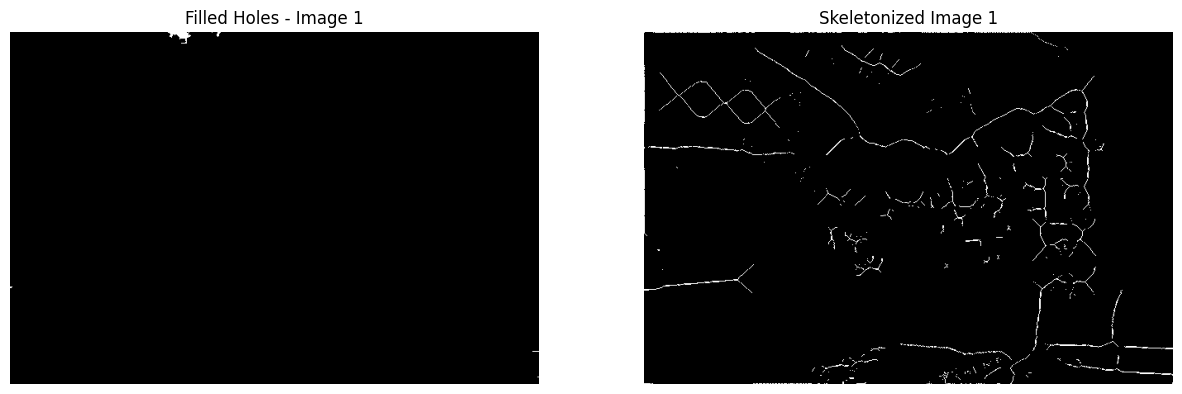

Filled image saved: morphological_results\filled_image_1.jpg
Skeletonized image saved: morphological_results\skeleton_image_1.jpg


In [35]:
# Perform Filling Holes
def fill_holes(image):
    # Invert the image
    inverted_image = cv2.bitwise_not(image)

    # Find contours
    contours, _ = cv2.findContours(inverted_image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # Fill the holes
    for contour in contours:
        cv2.drawContours(inverted_image, [contour], 0, 255, -1)

    # Invert back to original
    filled_image = cv2.bitwise_not(inverted_image)
    return filled_image

# Perform Skeletonization
def skeletonize_image(image):
    # Convert to binary
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Perform skeletonization
    skeleton = np.zeros_like(binary_image)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    while True:
        eroded = cv2.erode(binary_image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary_image, temp)
        skeleton = cv2.bitwise_or(skeleton, temp)
        binary_image = eroded.copy()
        if cv2.countNonZero(binary_image) == 0:
            break
    return skeleton

# Apply Filling Holes and Skeletonization for multiple images
for i in range(1, image_to_process + 1):
    input_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")
    eroded_path = os.path.join(output_directory, "eroded_image.jpg")
    eroded_image = cv2.imread(eroded_path, cv2.IMREAD_GRAYSCALE)

    # Apply Filling Holes and Skeletonization
    filled_image = fill_holes(eroded_image)
    skeleton_image = skeletonize_image(eroded_image)

    # Display the results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(filled_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Filled Holes - Image {i}')

    plt.subplot(1, 2, 2)
    plt.imshow(skeleton_image, cmap='gray')
    plt.axis('off')
    plt.title(f'Skeletonized Image {i}')

    plt.show()

    # Save the results
    filled_output_path = os.path.join(output_directory, f"filled_image_{i}.jpg")
    skeleton_output_path = os.path.join(output_directory, f"skeleton_image_{i}.jpg")

    cv2.imwrite(filled_output_path, filled_image)
    cv2.imwrite(skeleton_output_path, skeleton_image)

    print(f"Filled image saved: {filled_output_path}")
    print(f"Skeletonized image saved: {skeleton_output_path}")

## Tahap 5 (Feature Detection and Object Matching)
Pada tahap ini, kita akan melakukan deteksi fitur pada citra dan pencocokan objek menggunakan citra satu dengan citra lainnya. Kita akan menggunakan metode seperti SIFT, SURF, atau ORB untuk mendeteksi fitur pada citra. Selain itu, kita juga akan melakukan pencocokan objek menggunakan metode yang sesuai.

### Feature Detection
Deteksi fitur adalah proses menemukan titik-titik penting dalam citra yang dapat digunakan untuk analisis lebih lanjut. Pada tahap ini, kita akan menggunakan metode seperti SIFT, SURF, atau ORB untuk mendeteksi fitur pada citra. Metode ini membantu dalam menemukan pola dan struktur penting dalam citra.

- **SIFT (Scale-Invariant Feature Transform)** adalah metode yang kuat dan efisien untuk mendeteksi fitur dalam citra, dan dapat digunakan untuk berbagai aplikasi seperti pencocokan objek dan pengenalan pola.
- **SURF (Speeded-Up Robust Features)** adalah metode yang lebih cepat dibandingkan SIFT, tetapi tetap efektif dalam mendeteksi fitur dalam citra.
- **ORB (Oriented FAST and Rotated BRIEF)** adalah metode yang lebih cepat dan efisien dibandingkan SIFT dan SURF, tetapi tetap efektif dalam mendeteksi fitur dalam citra.

In [ ]:
def detect_features_with_sift(image_path, output_dir):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints, _ = sift.detectAndCompute(image, None)

    # Draw keypoints on the image
    feature_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Save the feature-detected image
    output_path = os.path.join(output_dir, f"SIFT_feature_image_{i}.jpg")
    cv2.imwrite(output_path, feature_image)
    print(f"SIFT feature-detected image saved: {output_path}")

    # Display the feature-detected image
    plt.imshow(cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"SIFT Feature Detection - Image {i}")
    plt.show()


# Directory to save feature-detected images
feature_methods_dir = 'feature_methods_images'
os.makedirs(feature_methods_dir, exist_ok=True)

# Loop through the number of images to process
for i in range(1, image_to_process + 1):
    input_path = os.path.join(denoised_dir, f"denoised_image_{i}.jpg")
    detect_features_with_sift(input_path, feature_methods_dir)


### Object Matching
Pencocokan objek adalah proses mencocokkan fitur yang terdeteksi pada citra satu dengan fitur pada citra lainnya. Pada tahap ini, kita akan menggunakan metode yang sesuai untuk melakukan pencocokan objek. Metode ini membantu dalam menemukan kesamaan antara dua citra dan dapat digunakan untuk berbagai aplikasi seperti pengenalan objek dan pelacakan.